# **Project 1 Report**

JALPA KAILA

CS658

## **P3-1. Revisit Text Documents Classification**

**(a) Load the following 4 categories from the 20 newsgroups dataset: categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space'].**

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Define the categories to load
categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']

# Load the dataset with the specified categories
newsgroups_data = fetch_20newsgroups(categories=categories)

# Display the number of documents and the target names
print(f'Number of documents: {len(newsgroups_data.data)}')
print(f'Target names: {newsgroups_data.target_names}')


Number of documents: 2148
Target names: ['comp.graphics', 'rec.autos', 'sci.space', 'talk.religion.misc']


**(b) Build classifiers using the following methods:
• Support Vector Machine (sklearn.svm.LinearSVC)
• Naive Bayes classifiers (sklearn.naive_bayes.MultinomialNB)
• K-nearest neighbors (sklearn.neighbors.KNeighborsClassifier)
• Random forest (sklearn.ensemble.RandomForestClassifier)
• AdaBoost classifier (sklearn.ensemble.AdaBoostClassifier)
Compare the classification accuracy of these methods.**

In [ ]:
#import necessary libraaries
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split

# Load training and test datasets with default split
categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

# Print the number of documents in training and test datasets
print(f"Number of documents in training dataset: {len(newsgroups_train.data)}")
print(f"Number of documents in test dataset: {len(newsgroups_test.data)}")

# # Split the dataset into training and test sets: this splits train-test data 80%-20% and gives better accuaracy
# X_train, X_test, y_train, y_test = train_test_split(newsgroups_data.data, newsgroups_data.target, test_size=0.2, random_state=42)

# # Convert text data into TF-IDF features
# vectorizer = TfidfVectorizer()
# X_train_tfidf = vectorizer.fit_transform(X_train)
# X_test_tfidf = vectorizer.transform(X_test)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(newsgroups_train.data)
X_test_tfidf = vectorizer.transform(newsgroups_test.data)

# Initialize classifiers
classifiers = {
    'Support Vectore Machine LinearSVC': LinearSVC(),
    'Naive Bayes classifiers MultinomialNB': MultinomialNB(),
    'K-nearest neighbors KNeighborsClassifier': KNeighborsClassifier(),
    'Random forest RandomForestClassifier': RandomForestClassifier(),
    'AdaBoost classifier AdaBoostClassifier': AdaBoostClassifier()
}

# Train classifiers and evaluate accuracy
accuracy_results = {}

for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(X_train_tfidf, newsgroups_train.target)
    # classifier.fit(X_train_tfidf, y_train)

    # Predict on the test set
    y_pred = classifier.predict(X_test_tfidf)


    # Calculate accuracy
    accuracy = accuracy_score(newsgroups_test.target, y_pred)
    # accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

# Display the accuracy results
for classifier_name, accuracy in accuracy_results.items():
    print(f"{classifier_name}: {accuracy:.4f}")

Number of documents in training dataset: 2148
Number of documents in test dataset: 1430


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Support Vectore Machine LinearSVC: 0.9524
Naive Bayes classifiers MultinomialNB: 0.9049
K-nearest neighbors KNeighborsClassifier: 0.8783
Random forest RandomForestClassifier: 0.8818
AdaBoost classifier AdaBoostClassifier: 0.7657


Above code classifies text documents from the 20 Newsgroups dataset using five machine learning classifiers: LinearSVC, MultinomialNB, KNeighborsClassifier, RandomForestClassifier, and AdaBoostClassifier.
The fetch_20newsgroups function loads specific categories of the dataset, splitting it into training and test sets. The TfidfVectorizer converts the text data into numerical features using the TF-IDF method, which quantifies the importance of words in the documents.
Each classifier is trained on the training data, and predictions are made on the test set using the pre-trained model. Accuracy is calculated by comparing the predicted results to the actual labels using accuracy_score. The accuracy of each classifier is then printed for comparison.
LinearSVC and MultinomialNB tend to provides good results for text classification tasks (accuracy around 95% and 90% accordingly), while classifiers like KNeighborsClassifier may show lower accuracy compared to previous two, due to the high dimensionality of the TF-IDF features. RandomForestClassifier and AdaBoostClassifier gives good accuracy as ensemble methods but not better than first two classifiers.
Though the accarcy can be changed from default split to different split of train and test data. Experiment also peformed with 80%-20% split of train and test data which increases accuracy for Support vector machine and K-nearest neighbour but remains almost same or some what more for other classfiers.



# **P3-2. Recognizing hand-written digits. Use the hand-written digits dataset embedded in scikit-learn**

**(a) Develop a multi-layer perceptron classifier to recognize images of hand-written digits with the classification accuracy larger than 90%. To build your classifier, you can use: sklearn.neural_network.MLPClassifier.**

In [ ]:
# Import necessary libraries
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the hand-written digits dataset
digits = datasets.load_digits()

# Split the dataset into training and test subsets (test_size=0.5)
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=42)

# Initialize the MLPClassifier

# Experimet with different hidden layer size and same maximum iteration
# mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)
# mlp = MLPClassifier(hidden_layer_sizes=(75,), max_iter=200, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=200, random_state=42)
# mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, random_state=42)
# mlp = MLPClassifier(hidden_layer_sizes=(25,), max_iter=200, random_state=42)

# Experimet with same hidden layer size and different maximum iteration
# mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=100, random_state=42)
# mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=75, random_state=42)
# mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=50, random_state=42)
# mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=25, random_state=42)
# mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=10, random_state=42)

# Train the classifier
mlp.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = mlp.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Classification accuracy: {accuracy * 100:.2f}%")


Classification accuracy: 96.77%


The above code implements a multi-layer perceptron (MLP) classifier to recognize hand-written digits using the digits dataset from scikit-learn. Initially, the dataset is loaded, which contains 8x8 pixel images representing digits from 0 to 9. The code then splits the data into training and testing subsets using the train_test_split function, with 50% of the data allocated for testing. Next, an instance of MLPClassifier is created, specifying a single hidden layer with 64 units and up to 200 iterations for training. The model is trained using the training subset of the data through the fit() method, which optimizes the weights of the neural network based on the input features and corresponding labels.
After training, the model makes predictions on the test dataset using the predict() function. The predicted labels are compared to the actual labels to evaluate performance, with the accuracy calculated using accuracy_score. This accuracy presents how well the classifier can identify hand-written digits.
The expected outcome is a classification accuracy larger than 90% which indicates that the MLP classifier effectively recognizes the patterns in hand-written digit images. The experiment performed with choice of parameters such as the nuber of hidden units and maximum iterations. MAximum iterations determines the number of epochs (how many times each data point will be used).
First experiment performed with different hidden layer size such as 100,75,64,50 and 25 and same maximum iteration 200. Second Experiment performed with same hidden layer size 64 and different maximum iteration such as 100,75,50,25 and 10. From the experimetn the maximumu accuracy obtained is **96.77% with parameter Hidden units=64 and maximum iterations=200**.

**(b) Show the confusion matrix of your neural network. Discuss and compare your results with the results using a support vector classifier.**

MLP Classifier Accuracy: 96.77%
SVC Classifier Accuracy: 98.78%


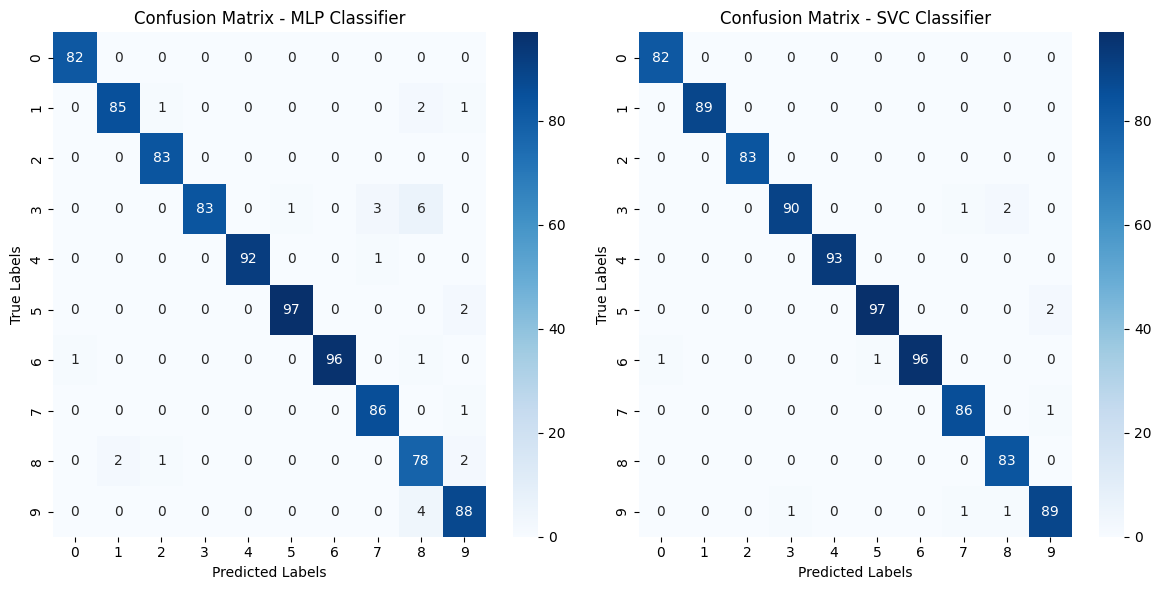

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
# from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load the hand-written digits dataset
digits = datasets.load_digits()

# Split the dataset into training and test subsets (test_size=0.5)
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=42)

# Initialize classifiers: MLP and SVC
mlp = MLPClassifier(hidden_layer_sizes=(64,), max_iter=200, random_state=42)
svc = SVC(gamma=0.001, C=100.) #C=100.
# linear_svc = LinearSVC(C=100, max_iter=10000)

# Train MLP classifier
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Train Support Vector Classifier
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# linear_svc.fit(X_train, y_train)
# y_pred_svc = linear_svc.predict(X_test)

# Calculate accuracy for both models
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# Print accuracies
print(f"MLP Classifier Accuracy: {accuracy_mlp * 100:.2f}%")
print(f"SVC Classifier Accuracy: {accuracy_svc * 100:.2f}%")

# Confusion Matrix for MLP
cm_mlp = confusion_matrix(y_test, y_pred_mlp)

# Confusion Matrix for SVC
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Plot both confusion matrices in a single figure using subplots
plt.figure(figsize=(12, 6))

# First subplot for MLP confusion matrix
plt.subplot(1, 2, 1)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title('Confusion Matrix - MLP Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# plt.show()

# Second subplot for SVC confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.title('Confusion Matrix - SVC Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
# plt.show()

# Show the plot with both confusion matrices
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


The above code performs image classification on the hand-written digits dataset using two machine learning models: a Multi-Layer Perceptron (MLP) neural network and a Support Vector Classifier (SVC). First, the dataset is split into training and test sets with a 50/50 ratio as per instruction given. The MLP classifier is initialized with a single hidden layer of 64 neurons and trained for up to 200 iterations, while the SVC uses a small gamma and high C value to capture fine decision boundaries. gamma=0.001 sets the influence of each point to be broad which results in a smoother decision boundary to generalize well across digit images. The C=100 value prioritizes accurate classification of training data, creating a narrower margin to handle complex digit distinctions. These settings of hyperparameter balance precision and generalization which helps the model to avoid overfitting and maintain robust classification.

After training each model, predictions are made on the test set using the trained model and their classification accuracy is calculated and displayed. The code then generates confusion matrices for both models and visualize their performance in terms of correctly and incorrectly classified digits. The confusion matrices are plotted side-by-side which provides an easy comparison of the classification results for the MLP and SVC classifiers. From the accuracy and confusion matrix, we can say that SVC classifier gives better accuracy 98.78% compared to MLP classifier 96.77% for hand written digit recognition.

# **P3-3. Nonlinear Support Vector Machine**

**(a) Randomly generate the following 2-class data points**
**import numpy as np**
**np.random.seed(0)**
**X = np.random.rand(300, 2)*10-5**
**Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).**

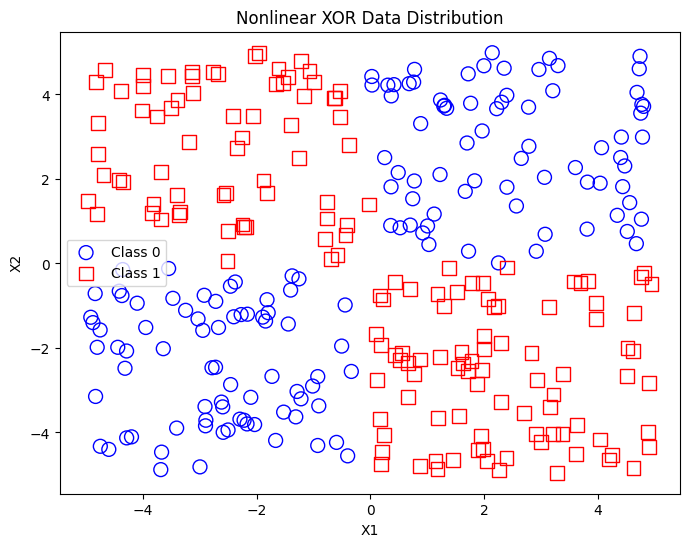

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate random data points
X = np.random.rand(300, 2) * 10 - 5  # Points between -5 and 5

# Generate labels using XOR condition for non-linear separability
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], marker='o', facecolors='none', edgecolors='blue', label='Class 0', s=100)
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], marker='s', facecolors='none', edgecolors='red', label='Class 1', s=100)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Nonlinear XOR Data Distribution")
plt.legend()
plt.show()


This code generates a 2D dataset with two classes in a non-linear pattern.
Random Seed: np.random.seed(0) ensures reproducibility, so the same random points are generated each time the code runs.
Data Generation: X = np.random.rand(300, 2) * 10 - 5 creates 300 points, each with two coordinates between -5 and 5.
Class Labeling (XOR Condition): Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0) assigns labels based on an XOR condition. If one coordinate is positive and the other is negative, the label is True (1). If both coordinates share the same sign either positive or negative, the label is False (0). This results in a non-linearly separable dataset.

**(b) Develop a nonlinear SVM binary classifier (sklearn.svm.NuSVC).**

NuSVC Classifier Accuracy with Polynomial Kernel (degree 2): 96.67%


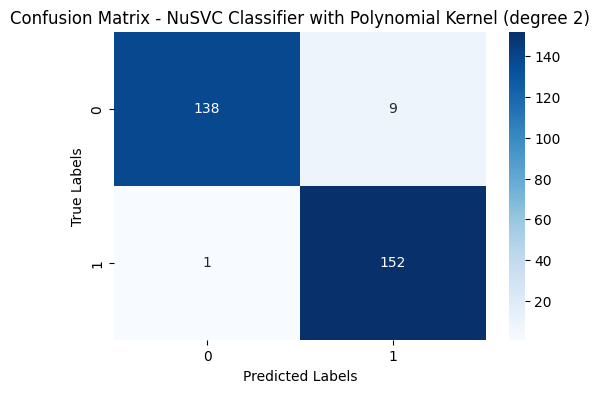

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(0)

# Generate random data points
X = np.random.rand(300, 2) * 10 - 5  # Points between -5 and 5

# Generate labels using XOR condition for non-linear separability
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# Initialize and train the NuSVC classifier with a polynomial kernel of degree 2
# nu_svc = NuSVC(kernel='poly', degree=2, nu=0.5, gamma='auto')
nu_svc = NuSVC(kernel='poly', degree=2, gamma='scale', coef0=1, nu=0.5, random_state=42)

nu_svc.fit(X, Y)

# Predict using the trained model
Y_pred = nu_svc.predict(X)

# Calculate accuracy
accuracy = accuracy_score(Y, Y_pred)
print(f"NuSVC Classifier Accuracy with Polynomial Kernel (degree 2): {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(Y, Y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix - NuSVC Classifier with Polynomial Kernel (degree 2)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

The Non-linear binary classifier (NuSVC) is used with a polynomial kernel of degree 2, gamma='scale', and coef0=1 for proper handling of the non-linear patterns in the data. The classifier is trained using this dataset and then used to predict the labels for the same set of points using trained model.
The model's accuracy is calculated with the accuracy_score function. A confusion matrix is then created to provide a detailed understanding of the model’s predictions versus actual labels which shows true positives, true negatives, false positives, and false negatives.

**(c) Plot these data points and the corresponding decision boundaries, which is similar to the figure in the slide 131 in Chapter 4.**

NuSVC Classifier Accuracy with Polynomial Kernel (degree 2): 96.67%


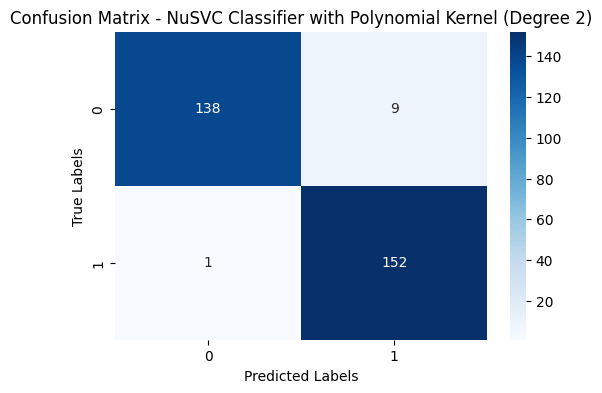

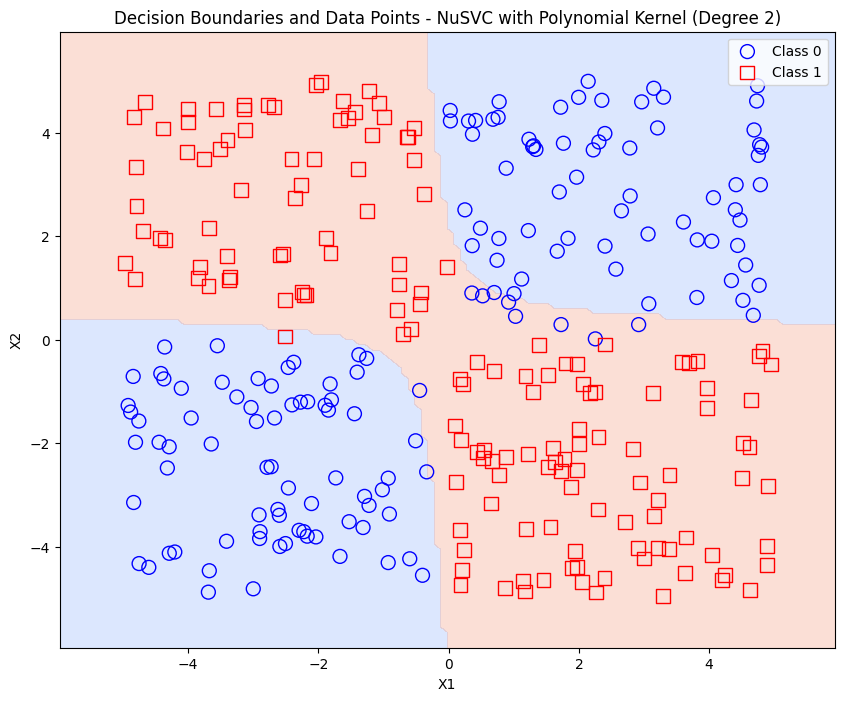

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(0)

# Generate random data points
X = np.random.rand(300, 2) * 10 - 5  # Points between -5 and 5

# Generate labels using XOR condition for non-linear separability
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# Initialize and train the NuSVC classifier with a polynomial kernel of degree 2
# nu_svc = NuSVC(kernel='poly', degree=2, nu=0.5, gamma='auto')
nu_svc = NuSVC(kernel='poly', degree=2, gamma='scale', coef0=1, nu=0.5, random_state=42)
nu_svc.fit(X, Y)

# Predict using the trained model
Y_pred = nu_svc.predict(X)

# Calculate accuracy
accuracy = accuracy_score(Y, Y_pred)
print(f"NuSVC Classifier Accuracy with Polynomial Kernel (degree 2): {accuracy * 100:.2f}%")

# Plotting the confusion matrix
cm = confusion_matrix(Y, Y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix - NuSVC Classifier with Polynomial Kernel (Degree 2)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Create a mesh grid for plotting decision boundaries
h = 0.1  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the mesh grid
Z = nu_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], marker='o', facecolors='none', edgecolors='blue', label='Class 0', s=100)
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], marker='s', facecolors='none', edgecolors='red', label='Class 1', s=100)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Decision Boundaries and Data Points - NuSVC with Polynomial Kernel (Degree 2)")
plt.legend()
plt.show()

In this code, after training the NuSVC classifier with a polynomial kernel of degree 2, the decision boundary of the classifier is visualized along with the data points. A mesh grid is created that spans the range of the data points in the 2D feature space. This grid is used to predict class labels over the entire space, which allows us to plot the decision boundaries of the classifier. The contourf function is used to fill the regions between decision boundaries, color-coding each region according to the predicted class label (Class 0 or Class 1). The data points are plotted using plt.scatter, where points belonging to Class 0 are marked with blue circles, and Class 1 points are marked with red squares. This plot is similar to the plot that mentioned in question, only difference is generated data points are 300 and plotted between -5 to 5 on both axis and in slide generated data points are 30 and plotted between 0 to 1 on both axis. Therefore the visualization looks different.